# Calculating the prior distribution

To calculate the equilibria of the signaling game we need the prior probability distribution, which we model as a beta distribution. The beta distribution allows for a fair amount of flexibility for a probability distribution over an interval.

In [58]:
from scipy.stats import beta, uniform
import numpy as np

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

We can visualize this for various values of the shape parameters $\alpha$ and $\beta$. As special cases, we 

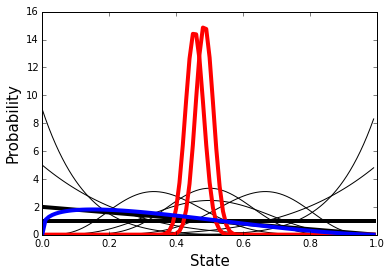

In [61]:
x = np.arange (0, 1, 0.01)
for alpha_var in range(1,10, 4):
    for beta_var in range(1,10, 4):
            y = beta.pdf(x,alpha_var,beta_var)
            plt.plot(x,y, 'k')
plt.plot(x, beta.pdf(x,1,2), linewidth=4, color='k')
plt.plot(x, beta.pdf(x,1,1), linewidth=4, color='k')
plt.plot(x, beta.pdf(x,152,182), linewidth=4, color='r')
plt.plot(x, beta.pdf(x,173,184), linewidth=4, color='r')
plt.plot(x, beta.pdf(x,b_fit.x[0],b_fit.x[1]), linewidth=4, color='b')
plt.ylabel("Probability", fontsize=15)
plt.xlabel("State", fontsize=15)
# Uncomment to save figure to file
#plt.savefig('beta-distribution.pdf', format='pdf', dpi=1000, fontsize=15)#, **hfont)
plt.show()

In [36]:
from sympy.stats import Uniform, Beta, density, E, sample, P
from sympy import symbols

In [24]:
wallage_data = np.matrix([[393, 203, 52], [346, 296, 42], [294, 179, 60]])
wallage_proportions = wallage_data.sum(axis=0)/float(wallage_data.sum())

In [31]:
def f(params):
    # Unpack parameters
    this_alpha = params[0]
    this_beta = params[1]
    # Calculate probabilities
    new = beta.cdf(1/3.0, this_alpha, this_beta)
    inf = beta.cdf(2/3.0, this_alpha, this_beta) - new
    old = beta.cdf(1, this_alpha, this_beta) - inf - new
    probabilities =  np.array([new, inf, old])
    # Calculate distance
    return np.abs(wallage_proportions - probabilities).sum()

In [37]:
from scipy.optimize import minimize

In [44]:
b_fit = minimize(f, [1,2], method="Nelder-Mead")
b_fit.x

array([ 1.28343156,  2.59841935])

#  Calculating evolutionarily stable strategies

In [45]:
states = symbols('t0:10') # Sufficient for up to ten messages
messages = symbols('m0:10')
actions = symbols('a0:10')
t, b = symbols('t b', positive=True)

In [46]:
from sympy import *
t, m, a, a_0, a_1, m_0, m_1, b = symbols('t m a a_0 a_1 m_0 m_1 b')
t_star = symbols('t_star')

In [47]:
X = Beta("x", 1,2)

part1 = 1 - (actions[0] - t - (1-t)*b)**2
part2 = 1 - (actions[1] - t - (1-t)*b)**2

full_S = integrate(part1*density(X)(t).evalf(), (t, 0, states[0])) + integrate(part2*density(X)(t).evalf(), (t, states[0], 1))
full_R = full_S.subs(b, 0)

In [48]:
t0_sol = Eq(solve(diff(full_S, states[0]), states[0])[0], states[0])
print t0_sol

0.25*(-a0 - a1 + 4.0*b - sqrt((a0 + a1 - 2.0)**2) - 2.0)/(b - 1.0) == t0


In [49]:
a0_sol = Eq(solve(diff(full_R, actions[0]), actions[0])[0], actions[0])
print a0_sol

0.333333333333333*t0*(2.0*t0 - 3.0)/(t0 - 2.0) == a0


In [50]:
a1_sol = Eq(solve(diff(full_R, actions[1]), actions[1])[0], actions[1])
print a1_sol

0.666666666666667*t0 + 0.333333333333333 == a1


In [51]:
result = solve([t0_sol, a0_sol, a1_sol], [states[0], actions[0], actions[1]])

KeyboardInterrupt: 

In [21]:
print result

[((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]


In [52]:
result = [((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]

In [53]:
result[1]

((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0),
 (-0.999999999999999 + 0.333333333333333*(18.0*b + 2.0*sqrt(9.0*b**2 - 18.0*b + 5.0) - 6.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)),
 0.333333333333333 + (6.0*b + 0.666666666666667*sqrt(9.0*b**2 - 18.0*b + 5.0) - 2.0)/(6.0*b - 2.0))

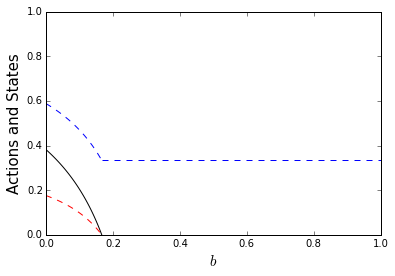

In [54]:
x = np.linspace(0,1/6.0, num=100)

plt.plot(x, [result[1][0].subs(b, value).evalf() for value in x], 'k')
plt.plot(x, [result[1][1].subs(b, value).evalf() for value in x], 'r', linestyle='--')
plt.plot(x, [result[1][2].subs(b, value).evalf() for value in x], 'b', linestyle='--')
plt.axhline(1/3.0, 1/6.0, 1, color='b', ls='--')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel(r"$b$", fontsize=15)
plt.ylabel("Actions and States", fontsize=15)
# Uncomment to save figure
#plt.savefig("sol2-beta.pdf", format='pdf', dpi=1000, fontsize=15)
plt.show()

In [56]:
solve(result[1][0], b)[0]

0.166666666666667

In [5]:
from scipy.stats import entropy

In [7]:
import numpy as np

In [9]:
[0]*3

[0, 0, 0]

In [34]:
def ptm1(point, states):
    return np.array([1/float(states)]*(point) + [0]*(states-point))
def ptm2(point, states):
    return np.array([0]*point + [1/float(states)]*(states-point))

In [35]:
ptm1(2, 10)

array([ 0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [36]:
np.repeat(1/10., 10)

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
n = 10
plt.plot(n, entropy(ptm1(1, n), np.repeat(1/float(n), n)))

In [61]:
for n in [10, 100, 1000, 10000]:
    plt.plot(n, entropy(ptm1(1, n), np.repeat(1/float(n), n)))
    plt.plot(n, entropy(ptm2(1, n), np.repeat(1/float(n), n)))
plt.show()

KeyboardInterrupt: 